In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
importacion = pd.read_excel("Datos.xlsx", sheet_name= "IMPORTACION", header=6) 
importacion = importacion.iloc[:288].reset_index(drop=True)

consumo = pd.read_excel("Datos.xlsx", sheet_name= "CONSUMO", header=6) 
consumo = consumo.iloc[:300].reset_index(drop= True)

In [4]:
importaciones = importacion[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]
consumos = consumo[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]

importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
consumos["Fecha"] = pd.to_datetime(consumos["Fecha"])
consumos.dtypes

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_27484\2987316155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
C:\Users\dfsf2\AppData\Local\Temp\ipykernel_27484\2987316155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Fecha"] = pd.to_datetime(consumos["Fecha"])


Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_27484\2569235440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Mes_num"] = importaciones["Fecha"].dt.month


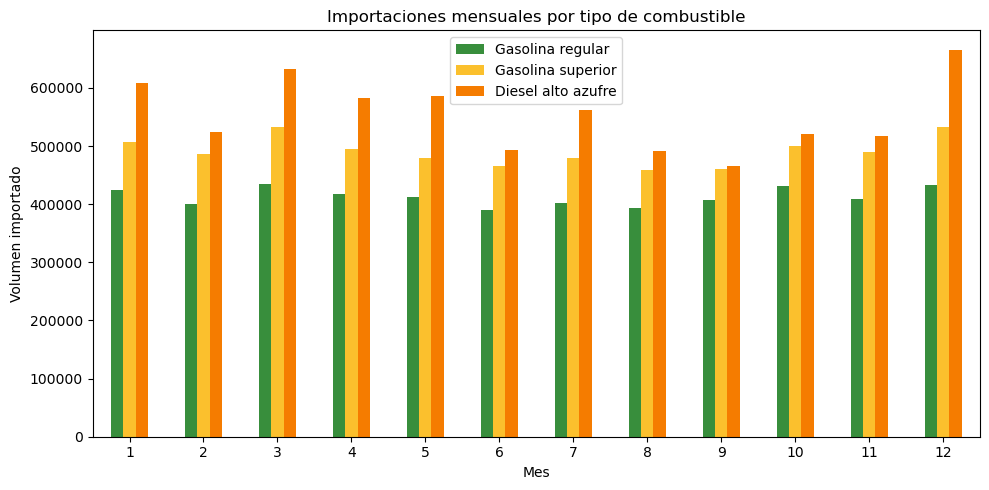

In [ ]:

importaciones["Mes_num"] = importaciones["Fecha"].dt.month

pro_mensual = importaciones.groupby(["Mes_num"])[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].mean()

colores = ['#388E3C', '#FBC02D', '#F57C00']  

pro_mensual.plot(kind="bar", figsize=(10, 5), color=colores)

plt.title("Importaciones mensuales por tipo de combustible")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_27484\4006555199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Año"] = importaciones["Fecha"].dt.year


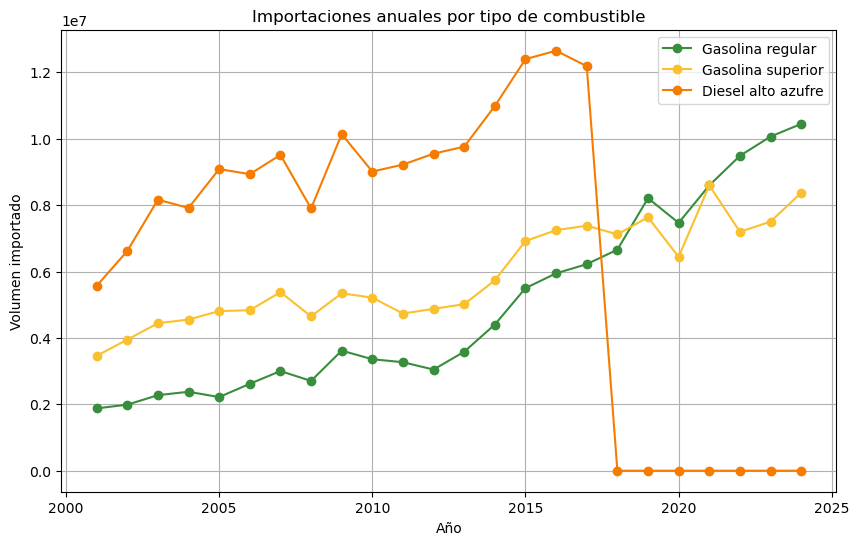

In [ ]:
importaciones["Año"] = importaciones["Fecha"].dt.year

colores = ['#388E3C', '#FBC02D', '#F57C00']  

importaciones.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].sum().plot(
    kind="line", marker="o", figsize=(10,6), color=colores
)

plt.title("Importaciones anuales por tipo de combustible")
plt.xlabel("Año")
plt.ylabel("Volumen importado")
plt.grid(True)
plt.show()


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_27484\2165375813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Mes_nombre"] = importaciones["Fecha"].dt.strftime('%b')
C:\Users\dfsf2\AppData\Local\Temp\ipykernel_27484\2165375813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)


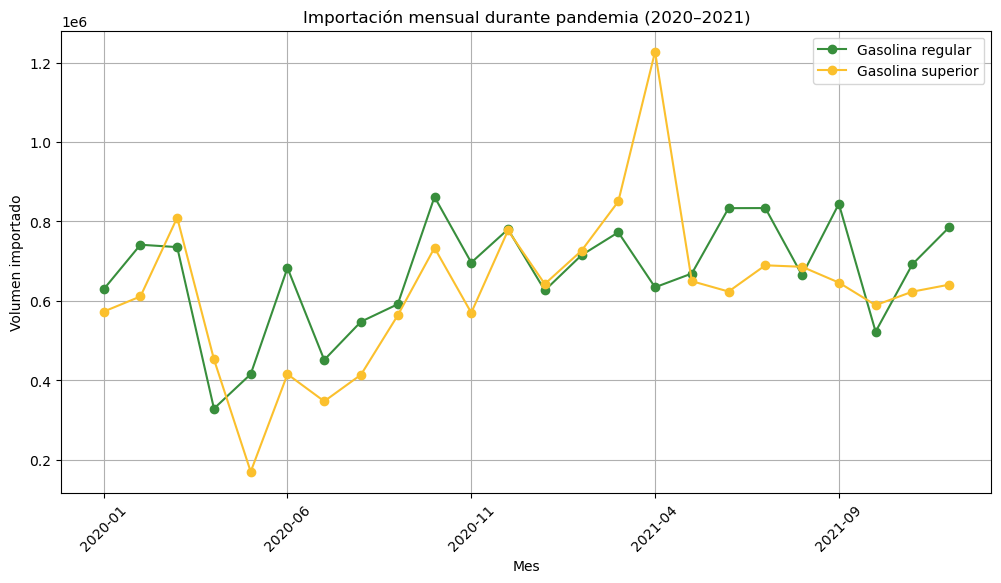

In [ ]:
importaciones["Mes_nombre"] = importaciones["Fecha"].dt.strftime('%b')

pandemia = importaciones[importaciones["Año"].isin([2020, 2021])]

pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)

mensual_pandemia = pandemia.groupby("Año_Mes")[["Gasolina regular", "Gasolina superior"]].sum()

colores = ['#388E3C', '#FBC02D']  

mensual_pandemia.plot(kind="line", marker="o", figsize=(12,6), color=colores)

plt.title("Importación mensual durante pandemia (2020–2021)")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
importaciones_anuales = importaciones.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].sum()

max_importaciones = importaciones_anuales.idxmax()

max_valores = importaciones_anuales.max()

print("Año con más importaciones por tipo de gasolina:")
print(max_importaciones)
print("\nValor máximo de importaciones por tipo de gasolina:")
print(max_valores)



Año con más importaciones por tipo de gasolina:
Gasolina regular      2024
Gasolina superior     2021
Diesel alto azufre    2016
dtype: int32

Valor máximo de importaciones por tipo de gasolina:
Gasolina regular      10445583.73
Gasolina superior      8595855.05
Diesel alto azufre    12650412.41
dtype: float64


In [ ]:
importaciones_diesel_hasta_2017 = importaciones[importaciones["Año"] <= 2017]

crecimiento_anual_regular = importaciones.groupby("Año")[["Gasolina regular"]].sum().pct_change() * 100
crecimiento_anual_superior = importaciones.groupby("Año")[["Gasolina superior"]].sum().pct_change() * 100
crecimiento_anual_diesel = importaciones_diesel_hasta_2017.groupby("Año")[["Diesel alto azufre"]].sum().pct_change() * 100

promedio_crecimiento_gasolina_regular = crecimiento_anual_regular["Gasolina regular"].mean()
promedio_crecimiento_gasolina_superior = crecimiento_anual_superior["Gasolina superior"].mean()
promedio_crecimiento_diesel = crecimiento_anual_diesel["Diesel alto azufre"].mean()

print(f"Crecimiento anual promedio de las importaciones:")
print(f"Gasolina Regular (todos los años): {promedio_crecimiento_gasolina_regular:.2f}%")
print(f"Gasolina Superior (todos los años): {promedio_crecimiento_gasolina_superior:.2f}%")
print(f"Diesel Alto Azufre (hasta 2017): {promedio_crecimiento_diesel:.2f}%")


Crecimiento anual promedio de las importaciones:
Gasolina Regular (todos los años): 8.38%
Gasolina Superior (todos los años): 4.56%
Diesel Alto Azufre (hasta 2017): 5.68%
